# 초기 데이터 분석 및 가설 검정 계획

### 초기 데이터 분석 결과
- 남학생과 여학생 간의 BMI와 하루 30분 이상 운동 빈도의 분포에서 차이가 관찰되었습니다.
- 이는 성별에 따라 **BMI**와 **운동 빈도** 간의 관계가 달라질 가능성이 있습니다. 
- 따라서, 성별에 따른 차이를 확인하기 위해 남학생과 여학생 데이터를 각각 독립적으로 분석하기로 하였습니다.

---

## 가설 검정을 위한 사전 작업

### 1. 정규성 검사
- **목적**: BMI가 정규 분포를 따르는지 확인.
- **방법**:
  - Shapiro-Wilk Test 또는 Kolmogorov-Smirnov Test 사용.
- **결과에 따른 분석 선택**:
  - **정규성을 만족**: ANOVA(분산 분석) 사용.
  - **정규성을 만족하지 않음**: Kruskal-Wallis Test(비모수 검정) 사용.

### 2. 등분산성 검사
- **목적**: 그룹 간 BMI 분산이 동일한지 확인.
- **방법**:
  - Levene's Test 또는 Bartlett's Test 사용.
- **결과에 따른 분석 선택**:
  - **등분산성이 성립**: ANOVA 사용.
  - **등분산성이 성립하지 않음**: Welch's ANOVA 고려.

---

## 가설 검정 순서

### 1. 연구 문제 정의
- **목적**: 성별(남학생, 여학생)에 따라 **하루 30분 이상 운동 빈도**가 **BMI**에 미치는 영향을 독립적으로 분석.
- **연구 질문**: 운동 빈도 그룹 간 BMI의 중앙값/평균값에 유의미한 차이가 존재하는가?

### 2. 데이터 준비
1. **성별로 데이터 분리**:
   - 남학생과 여학생 데이터를 각각 분리.
2. **결측치 제거**:
   - BMI 또는 운동 빈도 값이 누락된 데이터를 제거.
3. **극단치 제거**:
   - IQR(사분위수 범위)을 이용하여 극단치를 제거.
   - 극단치 제거 후 데이터의 정규성을 다시 확인.

### 3. 가설 설정
- **(a) 귀무가설 (H₀)**:
  - 운동 빈도 그룹 간 BMI 중앙값/평균값에는 유의미한 차이가 없다.
- **(b) 대립가설 (H₁)**:
  - 운동 빈도 그룹 간 BMI 중앙값/평균값에 유의미한 차이가 있다.

### 4. 가정 확인
1. **정규성 검사**:
   - Shapiro-Wilk Test 또는 Kolmogorov-Smirnov Test를 사용하여 BMI가 정규 분포를 따르는지 확인.
2. **결과에 따른 분류**:
   - **정규성을 만족**: ANOVA 사용.
   - **정규성을 만족하지 않음**: Kruskal-Wallis Test 사용.
3. **등분산성 검사**:
   - Levene's Test 또는 Bartlett's Test를 사용하여 그룹 간 BMI 분산이 동일한지 확인.
   - **등분산성이 성립하지 않을 경우**: Welch's ANOVA 고려.

### 5. 가설 검정
#### (a) 정규성을 만족하는 경우:
1. **분산 분석 (ANOVA)**:
   - 남학생과 여학생 각각에 대해 ANOVA를 수행하여 운동 빈도 그룹 간 BMI 평균값 차이를 확인.
   - 사후 검정(Tukey's HSD)을 통해 어떤 그룹 간 차이가 있는지 확인.

#### (b) 정규성을 만족하지 않는 경우:
1. **Kruskal-Wallis Test**:
   - 운동 빈도 그룹 간 BMI 중앙값 차이를 검정.
2. **Dunn's Test (사후 분석)**:
   - Kruskal-Wallis Test에서 차이가 유의미한 경우, 특정 그룹 간 차이를 비교.

---


In [4]:
import pandas as pd

file_path = '/Users/sim-yujin/Desktop/2-2 과목/통계적 데이터 분석/팀프로젝트/team-project/data/school_health_preprocessed.csv'

try:
    data = pd.read_csv(file_path, encoding='utf-8')
    print("데이터 로드 성공!")
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 경로를 확인하세요.")


print(data[['하루30분이상운동']].isnull().sum())

cleaned_data = data.dropna(subset=['BMI', '하루30분이상운동'])
print(f"Cleaned data size: {cleaned_data.shape}")

# 성별로 데이터 분리
male_data = cleaned_data[cleaned_data['성별'] == '남']
female_data = cleaned_data[cleaned_data['성별'] == '여']



데이터 로드 성공!
하루30분이상운동    35081
dtype: int64
Cleaned data size: (49790, 111)


### 정규성 가정 (Normality Assumption): KS Test 사용

**Kolmogorov-Smirnov Test (KS Test)**는 데이터의 분포가 특정 분포(예: 정규 분포)와 얼마나 일치하는지를 확인하기 위해 사용되었습니다.

Shapiro-Wilk Test는 정규성 검정에 더 민감하지만, 큰 샘플에서 p-value의 정확도가 떨어질 수 있다는 한계가 있습니다.

따라서, 본 분석에서는 큰 샘플 데이터를 다룰 때 유리한 KS Test를 선택하여 데이터의 정규성을 판단하고, 비모수적 검정(Kruskal-Wallis Test) 필요 여부를 결정하였습니다.

In [5]:
from scipy.stats import kstest
print("\n[Kolmogorov-Smirnov Test 결과]")

# 남학생 데이터
print("\n[남학생 데이터]")
for group in male_data['하루30분이상운동'].unique():
    group_data = male_data[male_data['하루30분이상운동'] == group]['BMI']
    stat, p = kstest(group_data, 'norm', args=(group_data.mean(), group_data.std()))
    print(f"운동 빈도 그룹 {group}: KS-Statistic = {stat:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        print(f" -> 그룹 {group}는 정규성을 따릅니다.")
    else:
        print(f" -> 그룹 {group}는 정규성을 따르지 않습니다.")

# 여학생 데이터
print("\n[여학생 데이터]")
for group in female_data['하루30분이상운동'].unique():
    group_data = female_data[female_data['하루30분이상운동'] == group]['BMI']
    stat, p = kstest(group_data, 'norm', args=(group_data.mean(), group_data.std()))
    print(f"운동 빈도 그룹 {group}: KS-Statistic = {stat:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        print(f" -> 그룹 {group}는 정규성을 따릅니다.")
    else:
        print(f" -> 그룹 {group}는 정규성을 따르지 않습니다.")



[Kolmogorov-Smirnov Test 결과]

[남학생 데이터]
운동 빈도 그룹 3.0: KS-Statistic = 0.0510, p-value = 0.0000
 -> 그룹 3.0는 정규성을 따르지 않습니다.
운동 빈도 그룹 4.0: KS-Statistic = 0.0568, p-value = 0.0000
 -> 그룹 4.0는 정규성을 따르지 않습니다.
운동 빈도 그룹 1.0: KS-Statistic = 0.0531, p-value = 0.0000
 -> 그룹 1.0는 정규성을 따르지 않습니다.
운동 빈도 그룹 2.0: KS-Statistic = 0.0545, p-value = 0.0000
 -> 그룹 2.0는 정규성을 따르지 않습니다.

[여학생 데이터]
운동 빈도 그룹 1.0: KS-Statistic = 0.0774, p-value = 0.0000
 -> 그룹 1.0는 정규성을 따르지 않습니다.
운동 빈도 그룹 2.0: KS-Statistic = 0.0676, p-value = 0.0000
 -> 그룹 2.0는 정규성을 따르지 않습니다.
운동 빈도 그룹 3.0: KS-Statistic = 0.0661, p-value = 0.0000
 -> 그룹 3.0는 정규성을 따르지 않습니다.
운동 빈도 그룹 4.0: KS-Statistic = 0.0598, p-value = 0.0000
 -> 그룹 4.0는 정규성을 따르지 않습니다.


모든 그룹에서 p-value가 0.0000으로 나타났습니다.
이는 BMI 분포가 정규성을 따르지 않는다는 것을 의미합니다.
따라서, 남학생 데이터는 정규성 가정을 만족하지 않으므로 비모수적 검정이 필요합니다

여학생 데이터에서도 모든 그룹에서 p-value가 0.0000으로 나타났습니다.
따라서, 여학생 데이터 역시 BMI 분포가 정규성을 따르지 않으므로 비모수적 검정이 필요합니다.

### 등분산성 가정 (Homogeneity of Variance) : Levene’s Test

Levene’s Test는 여러 그룹 간의 분산이 동일한지(등분산성)를 검정하는 통계적 방법입니다. 데이터가 정규성을 따르지 않더라도 사용할 수 있기 때문에, 정규성 여부와 관계없이 등분산성을 확인할 때 적합합니다.

Levene’s Test의 결과 해석
- 귀무가설 (H₀): 그룹 간의 분산이 동일하다.
- 대립가설 (H₁): 그룹 간의 분산이 동일하지 않다.
- p-value < 0.05: 귀무가설 기각 → 등분산성이 충족되지 않음.
- p-value ≥ 0.05: 귀무가설 채택 → 등분산성이 충족됨.

In [6]:
from scipy.stats import levene

# 남학생 등분산성 검정
male_groups = [male_data[male_data['하루30분이상운동'] == group]['BMI'] for group in male_data['하루30분이상운동'].unique()]
stat, p = levene(*male_groups)
print("\n[남학생 등분산성 검정 결과]")
print(f"Levene’s Test: W-Statistic = {stat:.4f}, p-value = {p:.4f}")
if p > 0.05:
    print(" -> 그룹 간 분산이 동일합니다 (등분산성 가정 충족).")
else:
    print(" -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).")

# 여학생 등분산성 검정
female_groups = [female_data[female_data['하루30분이상운동'] == group]['BMI'] for group in female_data['하루30분이상운동'].unique()]
stat, p = levene(*female_groups)
print("\n[여학생 등분산성 검정 결과]")
print(f"Levene’s Test: W-Statistic = {stat:.4f}, p-value = {p:.4f}")
if p > 0.05:
    print(" -> 그룹 간 분산이 동일합니다 (등분산성 가정 충족).")
else:
    print(" -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).")



[남학생 등분산성 검정 결과]
Levene’s Test: W-Statistic = 38.7087, p-value = 0.0000
 -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).

[여학생 등분산성 검정 결과]
Levene’s Test: W-Statistic = 14.2483, p-value = 0.0000
 -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).


[남학생 등분산성 검정 결과]
W-Statistic: 38.7087
p-value: 0.0000
p-value가 0.05보다 작으므로, 운동 빈도 그룹 간 분산이 동일하지 않음을 나타냅니다. 이는 등분산성 가정이 위반되었음을 의미합니다.

[여학생 등분산성 검정 결과]
W-Statistic: 14.2483
p-value: 0.0000
여학생의 경우에도 p-value가 0.05보다 작으므로, 운동 빈도 그룹 간 분산이 동일하지 않음을 나타냅니다. 따라서, 여학생 데이터 또한 등분산성 가정이 위반되었습니다

# 비모수 검정 (Kruskal-Wallis Test)을 사용

---

## 1. 정규성 및 등분산성 가정 위반

### **(a) 정규성 위반**
- **Kolmogorov-Smirnov Test** 결과:
  - 남학생과 여학생의 모든 운동 빈도 그룹에서 데이터가 정규 분포를 따르지 않음.
- 정규성 가정이 충족되지 않으므로, **모수적 방법(ANOVA)** 사용이 부적절함.

### **(b) 등분산성 위반**
- **Levene’s Test** 결과:
  - 남학생과 여학생 모두에서 그룹 간 분산이 동일하지 않음.
- 등분산성 가정이 충족되지 않아, 모수적 방법의 정확성이 저하될 수 있음.

---

## 2. Kruskal-Wallis Test의 적합성

- Kruskal-Wallis Test는 **3개 이상의 독립 그룹 간 중앙값 차이를 비교**하는 비모수 검정 방법입니다.
- 그룹 내 데이터를 순위화(Rank)한 뒤, 그룹 간 순위의 차이가 유의미한지를 판단합니다.

### **(b) 주요 가정**
1. **독립성**:
   - 각 그룹의 데이터는 서로 독립적이어야 함. -> 데이터 수집 과정에서 반복측정이 포함되지 않았기에 성립 
2. **동일한 척도**:
   - 모든 그룹이 동일한 측정 척도를 사용해야 함. -> 변수(BMI 등)가 동일한 스케일에서 측정되어서 만족 
3. **분포 모양의 유사성**
  -  Levene’s Test를 사용해 분산 차이가 큰지 점검. -> 분산 차이가 있기 때문에 해석에 주의해야된다 

### **(c) 귀무가설 및 대립가설**
- **귀무가설(H₀)**:
  - 그룹 간 중앙값에 차이가 없다.
- **대립가설(H₁)**:
  - 그룹 간 중앙값에 차이가 있다.




In [10]:
from scipy.stats import kruskal

# 남학생 Kruskal-Wallis Test
male_group_1 = male_data[male_data['하루30분이상운동'] == 1]['BMI']
male_group_2 = male_data[male_data['하루30분이상운동'] == 2]['BMI']
male_group_3 = male_data[male_data['하루30분이상운동'] == 3]['BMI']
male_group_4 = male_data[male_data['하루30분이상운동'] == 4]['BMI']

stat_male, p_male = kruskal(male_group_1, male_group_2, male_group_3, male_group_4)
print(f"[남학생 Kruskal-Wallis Test] H-Statistic: {stat_male:.4f}, p-value: {p_male:.4f}")
if p_male < 0.05:
    print(" -> 남학생 그룹 간 BMI 중앙값에 유의미한 차이가 있습니다.")
else:
    print(" -> 남학생 그룹 간 BMI 중앙값에 유의미한 차이가 없습니다.")

# 여학생 Kruskal-Wallis Test
female_group_1 = female_data[female_data['하루30분이상운동'] == 1]['BMI']
female_group_2 = female_data[female_data['하루30분이상운동'] == 2]['BMI']
female_group_3 = female_data[female_data['하루30분이상운동'] == 3]['BMI']
female_group_4 = female_data[female_data['하루30분이상운동'] == 4]['BMI']

stat_female, p_female = kruskal(female_group_1, female_group_2, female_group_3, female_group_4)
print(f"[여학생 Kruskal-Wallis Test] H-Statistic: {stat_female:.4f}, p-value: {p_female:.4f}")
if p_female < 0.05:
    print(" -> 여학생 그룹 간 BMI 중앙값에 유의미한 차이가 있습니다.")
else:
    print(" -> 여학생 그룹 간 BMI 중앙값에 유의미한 차이가 없습니다.")


[남학생 Kruskal-Wallis Test] H-Statistic: 25.7891, p-value: 0.0000
 -> 남학생 그룹 간 BMI 중앙값에 유의미한 차이가 있습니다.
[여학생 Kruskal-Wallis Test] H-Statistic: 138.7144, p-value: 0.0000
 -> 여학생 그룹 간 BMI 중앙값에 유의미한 차이가 있습니다.


남학생과 여학생 모두에서 운동 빈도 그룹 간 BMI 중앙값의 차이가 유의미하다는 결과를 얻었습니다.

따라서, 운동 빈도와 BMI 간의 관계를 보다 세부적으로 파악하기 위해 **사후 분석**을 수행할 필요가 있습니다.

# 사후 분석 : Dunn’s Test 사용

- **Dunn’s Test**는 Kruskal-Wallis Test와 동일한 **비모수적 접근 방식**을 따릅니다.
- 따라서 **정규성 가정이 충족되지 않는 데이터**에서도 사용 가능하며, 그룹 간 순위를 기반으로 중앙값의 차이를 비교합니다.


## 2. Dunn’s Test가 필요한 이유
- **Kruskal-Wallis Test의 한계**:
  - Kruskal-Wallis Test는 그룹 간 차이가 유의미한지를 알려주지만, **특정 그룹 간의 차이**에 대한 정보를 제공하지 않습니다.
- **Dunn’s Test의 역할**:
  - Kruskal-Wallis Test에서 유의미한 결과를 얻은 경우, 그룹 간의 **쌍별 비교(pairwise comparison)**를 통해 **구체적인 차이**를 확인할 수 있습니다.

---

## 3. Dunn’s Test의 주요 가정
1. **독립성**: 각 그룹의 데이터가 서로 독립적이어야 합니다.
2. **척도 동일성**: 모든 그룹의 데이터가 동일한 척도를 사용해야 합니다.
3. **비모수적 특성**: 정규성 및 등분산성 가정이 필요하지 않음.

---

## 4. Kruskal-Wallis Test와 Dunn’s Test의 관계
1. **Kruskal-Wallis Test**:
   - 그룹 간 중앙값에 차이가 있는지 확인.
   - 귀무가설(H₀): 모든 그룹의 중앙값이 동일하다.
   - 대립가설(H₁): 하나 이상의 그룹 간 중앙값 차이가 존재한다.
2. **Dunn’s Test**:
   - Kruskal-Wallis Test에서 귀무가설이 기각되었을 때, **특정 그룹 간의 차이**를 쌍별로 비교.

---


In [26]:
from scikit_posthocs import posthoc_dunn
import pandas as pd

# 남학생 데이터
male_dunn_results = posthoc_dunn(
    [male_group_1, male_group_2, male_group_3, male_group_4], p_adjust='bonferroni'
)
print("[남학생 Dunn’s Test 결과]")
print(pd.DataFrame(male_dunn_results, index=[1, 2, 3, 4], columns=[1, 2, 3, 4]))

# 여학생 데이터
female_dunn_results = posthoc_dunn(
    [female_group_1, female_group_2, female_group_3, female_group_4], p_adjust='bonferroni'
)
print("\n[여학생 Dunn’s Test 결과]")
print(pd.DataFrame(female_dunn_results, index=[1, 2, 3, 4], columns=[1, 2, 3, 4]))


[남학생 Dunn’s Test 결과]
          1         2         3         4
1  1.000000  0.300897  0.023256  0.108919
2  0.300897  1.000000  1.000000  1.000000
3  0.023256  1.000000  1.000000  1.000000
4  0.108919  1.000000  1.000000  1.000000

[여학생 Dunn’s Test 결과]
              1             2             3             4
1  1.000000e+00  3.877654e-17  2.686473e-17  4.427146e-09
2  3.877654e-17  1.000000e+00  1.614312e-01  1.000000e+00
3  2.686473e-17  1.614312e-01  1.000000e+00  1.000000e+00
4  4.427146e-09  1.000000e+00  1.000000e+00  1.000000e+00



#### 남학생 Dunn’s Test 결과

| Group | Group | p-value | 해석                       |
|-------|-------|---------|--------------------------|
| 1     | 2     | 0.3009  | 그룹 1과 그룹 2 간 차이는 유의미하지 않음. |
| 1     | 3     | 0.0233  | 그룹 1과 그룹 3 간 차이는 유의미함.       |
| 1     | 4     | 0.1089  | 그룹 1과 그룹 4 간 차이는 유의미하지 않음. |
| 2     | 3     | 1.0000  | 그룹 2와 그룹 3 간 차이는 유의미하지 않음. |
| 2     | 4     | 1.0000  | 그룹 2와 그룹 4 간 차이는 유의미하지 않음. |
| 3     | 4     | 1.0000  | 그룹 3과 그룹 4 간 차이는 유의미하지 않음. |

- 남학생 데이터에서 **운동 빈도 그룹 1과 3 간에만 유의미한 차이**가 관찰되었습니다.  
- 나머지 그룹 간에는 BMI 중앙값의 차이가 유의미하지 않습니다.

---

#### 여학생 Dunn’s Test 결과

| Group | Group | p-value      | 해석                       |
|-------|-------|--------------|--------------------------|
| 1     | 2     | 3.88e-17     | 그룹 1과 그룹 2 간 차이는 유의미함.       |
| 1     | 3     | 2.69e-17     | 그룹 1과 그룹 3 간 차이는 유의미함.       |
| 1     | 4     | 4.43e-09     | 그룹 1과 그룹 4 간 차이는 유의미함.       |
| 2     | 3     | 0.1614       | 그룹 2와 그룹 3 간 차이는 유의미하지 않음. |
| 2     | 4     | 1.0000       | 그룹 2와 그룹 4 간 차이는 유의미하지 않음. |
| 3     | 4     | 1.0000       | 그룹 3과 그룹 4 간 차이는 유의미하지 않음. |

### 결론
- 여학생 데이터에서 **운동 빈도 그룹 1과 다른 모든 그룹(2, 3, 4) 간에 유의미한 차이**가 관찰되었습니다.  
- 나머지 그룹(2, 3, 4) 간에는 BMI 중앙값의 차이가 유의미하지 않습니다.

---

- 여학생의 경우 운동 빈도가 높아질수록 BMI 중앙값의 차이가 두드러지는 경향이 강하게 나타났습니다.
- 남학생의 경우 그룹 1(운동하지 않음)과 그룹 3(운동 빈도 중간) 간에만 차이가 관찰되었으며, 전반적으로 그룹 간 차이가 미미함을 알 수 있습니다.

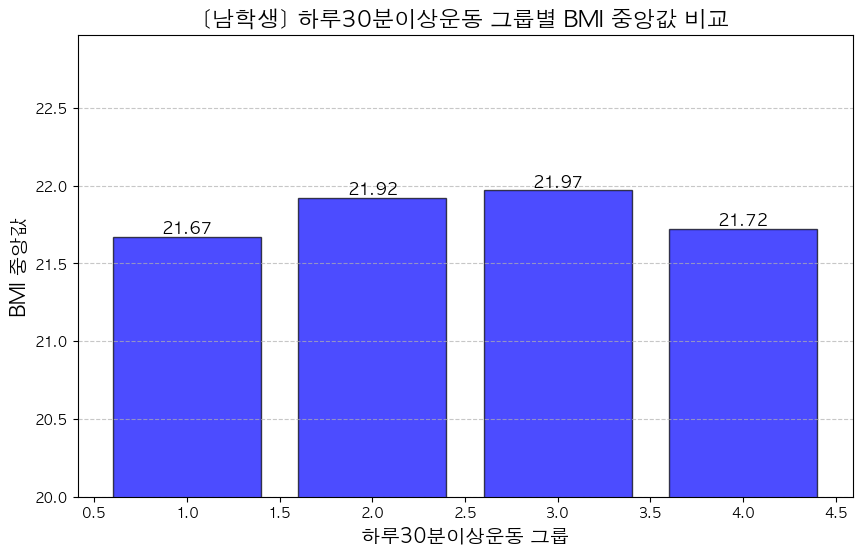

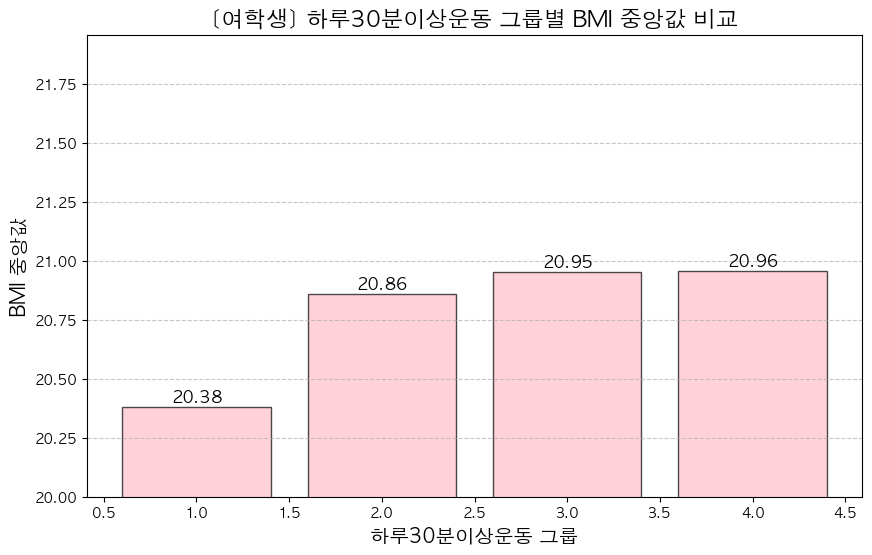

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# 남학생 중앙값 비교
plt.figure(figsize=(10, 6))
bars = plt.bar(male_medians.index, male_medians.values, color='blue', alpha=0.7, edgecolor='black')
plt.title('[남학생] 하루30분이상운동 그룹별 BMI 중앙값 비교', fontsize=16)
plt.xlabel('하루30분이상운동 그룹', fontsize=14)
plt.ylabel('BMI 중앙값', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 값 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, 
             f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.ylim(20, max(male_medians.values) + 1)  # Y축 범위 조정
plt.show()

# 여학생 중앙값 비교
plt.figure(figsize=(10, 6))
bars = plt.bar(female_medians.index, female_medians.values, color='pink', alpha=0.7, edgecolor='black')
plt.title('[여학생] 하루30분이상운동 그룹별 BMI 중앙값 비교', fontsize=16)
plt.xlabel('하루30분이상운동 그룹', fontsize=14)
plt.ylabel('BMI 중앙값', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 값 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, 
             f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.ylim(20, max(female_medians.values) + 1)  # Y축 범위 조정
plt.show()


Kruskal-Wallis Test 및 Dunn’s Test는 순위를 기반으로 그룹 간 차이를 검정하며, 중앙값은 그룹 간 차이를 파악하는 중요한 척도입니다. 따라서, 운동 빈도 그룹 간 BMI 중앙값의 차이를 시각적으로 확인하기 위해 Bar Plot을 활용하여 중앙값을 표현하였습니다.

남학생:
- 특정 그룹 간 유의미한 차이가 존재했지만, 전반적인 영향은 제한적으로 나타났습니다.
- Group 1과 Group 3 간 차이가 유의미하지만, 다른 그룹 간에는 차이가 크지 않음.

    운동 빈도만으로 BMI 변화가 충분히 설명되지 않으므로, 운동 습관 외의 요인을 추가로 탐구할 필요가 있습니다.
        예: 식습관, 스트레스 수준, 수면 시간 등 다른 변수를 고려.

여학생:
- 운동 빈도가 증가함에 따라 BMI 중앙값에서 명확한 변화가 관찰되었습니다.
- 특히 Group 1(운동 안 함)과 다른 그룹(Group 2, 3, 4) 간에는 매우 유의미한 차이가 존재.

특이점:
    운동 빈도가 늘어날수록 BMI 중앙값이 증가하는 경향을 보임.
    이는 BMI와 운동 빈도 사이의 관계가 단순하지 않을 수 있음을 시사.

    여학생의 경우 운동 빈도가 BMI에 미치는 영향이 뚜렷하지만, 운동 외 다른 요인(예: 식사량 등)을 함께 탐구해야 할 필요가 있습니다.
